In [21]:
pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/32/07/3d355f71fb32f9d780d0099ece83dd10f0b9b71a9359cd468f3c25c52bfc/wordcloud-1.9.4-cp311-cp311-macosx_10_9_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.7/171.7 kB 2.5 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [22]:
import json
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from datetime import datetime

# Assurez-vous d'installer ces packages au préalable si vous ne les avez pas
# pip install pandas matplotlib wordcloud nltk

# Charger le fichier JSON
with open('watch-history.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

# Convertir en DataFrame
df = pd.json_normalize(data)

# Afficher les premières lignes pour vérifier la structure
print(df.head())


    header                                              title  \
0  YouTube  Vous avez regardé How to build an ETL pipeline...   
1  YouTube         Vous avez regardé ALDI - Fruits et légumes   
2  YouTube  Vous avez regardé TAI | Haïti, son ascension, ...   
3  YouTube  Vous avez regardé YouTube Ad - 2403 - Awarenes...   
4  YouTube  Vous avez regardé How to build an ETL pipeline...   

                                      titleUrl  \
0  https://www.youtube.com/watch?v=dfouoh9QdUw   
1  https://www.youtube.com/watch?v=te-l5AwXOSA   
2  https://www.youtube.com/watch?v=6Wk3qcjVJ0k   
3  https://www.youtube.com/watch?v=3xI8Tu4JXdw   
4  https://www.youtube.com/watch?v=dfouoh9QdUw   

                                           subtitles  \
0  [{'name': 'BI Insights Inc', 'url': 'https://w...   
1                                                NaN   
2  [{'name': 'CKO', 'url': 'https://www.youtube.c...   
3                                                NaN   
4  [{'name': 'BI Insights In

In [24]:
# Filtrer les lignes qui ne contiennent pas 'Des annonces Google'
df_filtered = df[~df['details'].astype(str).str.contains("'name': 'Des annonces Google'", na=False)]

# Afficher la nouvelle structure des données
print("Données après suppression des annonces Google :")
print(df_filtered.head())

Données après suppression des annonces Google :
    header                                              title  \
0  YouTube  Vous avez regardé How to build an ETL pipeline...   
2  YouTube  Vous avez regardé TAI | Haïti, son ascension, ...   
4  YouTube  Vous avez regardé How to build an ETL pipeline...   
5  YouTube  Vous avez regardé How to build and automate yo...   
7  YouTube             Vous avez regardé VISUAL STUDIO Part 7   

                                      titleUrl  \
0  https://www.youtube.com/watch?v=dfouoh9QdUw   
2  https://www.youtube.com/watch?v=6Wk3qcjVJ0k   
4  https://www.youtube.com/watch?v=dfouoh9QdUw   
5  https://www.youtube.com/watch?v=eZfD6x9FJ4E   
7  https://www.youtube.com/watch?v=PUp47bg-X6g   

                                           subtitles  \
0  [{'name': 'BI Insights Inc', 'url': 'https://w...   
2  [{'name': 'CKO', 'url': 'https://www.youtube.c...   
4  [{'name': 'BI Insights Inc', 'url': 'https://w...   
5  [{'name': 'BI Insights Inc', 'url

In [25]:
# Extraire le titre des vidéos et compter les occurrences
top_videos = df_filtered['title'].value_counts().head(10)

# Afficher les vidéos les plus regardées
print("Les vidéos les plus regardées :")
print(top_videos)

Les vidéos les plus regardées :
title
Vous avez regardé Belka Tobis- Solitude                                    11
Vous avez regardé HollyG - Bandit ( Oui Oui Oui ) Clip Officiel             9
Vous avez regardé Lil Pump - ESSKEETIT [Official Music Video]               9
Vous avez regardé Ninho - Binks To Binks Part. 2 (Freestyle)                8
Vous avez regardé Tayc - Promis Juré                                        8
Vous avez regardé Ninho - Binks To Binks Part. 6                            8
Vous avez regardé Olivier Declovis BONGA  azuk na kwa.mp4                   8
Vous avez regardé Charlotte Dipanda Ft. Richard Bona - Bodimbea             8
Vous avez regardé Henri Dikongué - Bulu Bo Windi Tenge (with lyrics)        8
Vous avez regardé Serge Ibaka x Ninho - Champion (Official Music Video)     8
Name: count, dtype: int64


Jours de visionnage les plus fréquents :
day_of_week
Friday       1269
Monday       1196
Tuesday      1125
Saturday     1063
Thursday     1055
Wednesday    1010
Sunday        988
Name: count, dtype: int64
Heures de visionnage les plus fréquentes :
hour_of_day
0.0     225
1.0     128
2.0      99
3.0      76
4.0     194
5.0     149
6.0     227
7.0     268
8.0     324
9.0     360
10.0    366
11.0    331
12.0    503
13.0    573
14.0    413
15.0    365
16.0    437
17.0    530
18.0    393
19.0    360
20.0    332
21.0    393
22.0    364
23.0    296
Name: count, dtype: int64


/var/folders/28/zrs79s3j3bz69sbkyn69kh1m0000gn/T/ipykernel_2847/176055140.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['time'] = pd.to_datetime(df_filtered['time'], errors='coerce')
/var/folders/28/zrs79s3j3bz69sbkyn69kh1m0000gn/T/ipykernel_2847/176055140.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['day_of_week'] = df_filtered['time'].dt.day_name()
/var/folders/28/zrs79s3j3bz69sbkyn69kh1m0000gn/T/ipykernel_2847/176055140.py:6: SettingWithCopyWarning: 
A value is trying

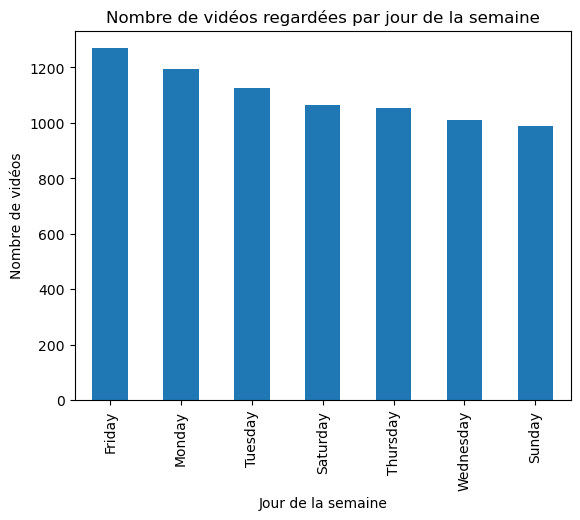

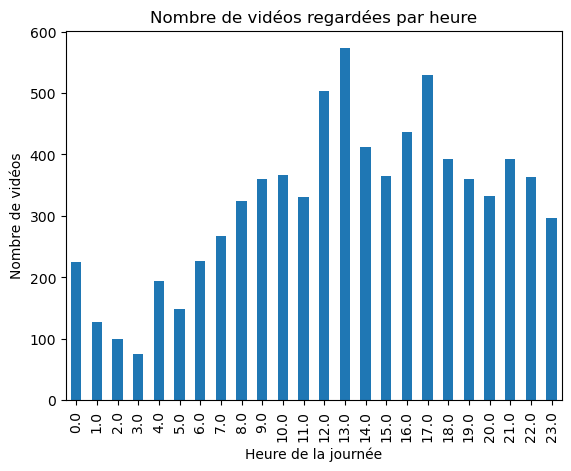

In [27]:
# Convertir la colonne 'time' en datetime
df_filtered['time'] = pd.to_datetime(df_filtered['time'], errors='coerce')

# Extraire les jours et heures
df_filtered['day_of_week'] = df_filtered['time'].dt.day_name()
df_filtered['hour_of_day'] = df_filtered['time'].dt.hour

# Compter le nombre de vidéos par jour
videos_by_day = df_filtered['day_of_week'].value_counts()

# Compter le nombre de vidéos par heure
videos_by_hour = df_filtered['hour_of_day'].value_counts().sort_index()

# Afficher les jours les plus populaires
print("Jours de visionnage les plus fréquents :")
print(videos_by_day)

# Afficher les heures les plus populaires
print("Heures de visionnage les plus fréquentes :")
print(videos_by_hour)

# Graphique des jours de la semaine
videos_by_day.plot(kind='bar', title='Nombre de vidéos regardées par jour de la semaine')
plt.xlabel('Jour de la semaine')
plt.ylabel('Nombre de vidéos')
plt.show()

# Graphique des heures
videos_by_hour.plot(kind='bar', title='Nombre de vidéos regardées par heure')
plt.xlabel('Heure de la journée')
plt.ylabel('Nombre de vidéos')
plt.show()


Nombre de vidéos regardées par année :
year
2017.0     690
2018.0     260
2019.0     570
2020.0     697
2021.0    1743
2022.0    1286
2023.0    1298
2024.0    1162
Name: count, dtype: int64

Nombre de vidéos regardées par mois :
month
2017-10     65
2017-11    495
2017-12    130
2018-01      5
2018-02      4
          ... 
2024-07     51
2024-08     94
2024-09    100
2024-10    213
2024-11    126
Freq: M, Name: count, Length: 85, dtype: int64


/var/folders/28/zrs79s3j3bz69sbkyn69kh1m0000gn/T/ipykernel_2847/1513167335.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['time'] = pd.to_datetime(df_filtered['time'], errors='coerce')
/var/folders/28/zrs79s3j3bz69sbkyn69kh1m0000gn/T/ipykernel_2847/1513167335.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['year'] = df_filtered['time'].dt.year
/var/folders/28/zrs79s3j3bz69sbkyn69kh1m0000gn/T/ipykernel_2847/1513167335.py:9: UserWarning: Converting to PeriodArray/Index represe

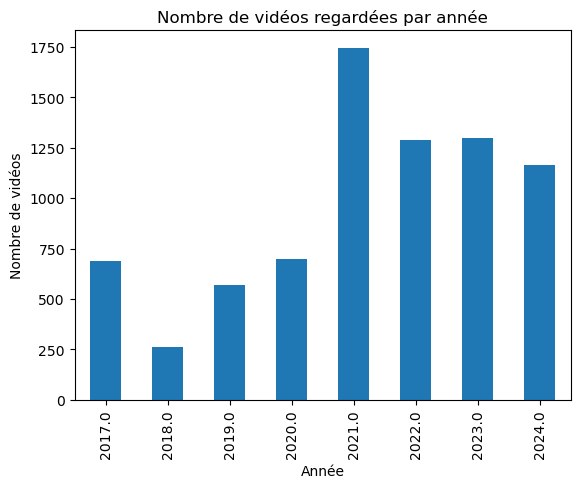

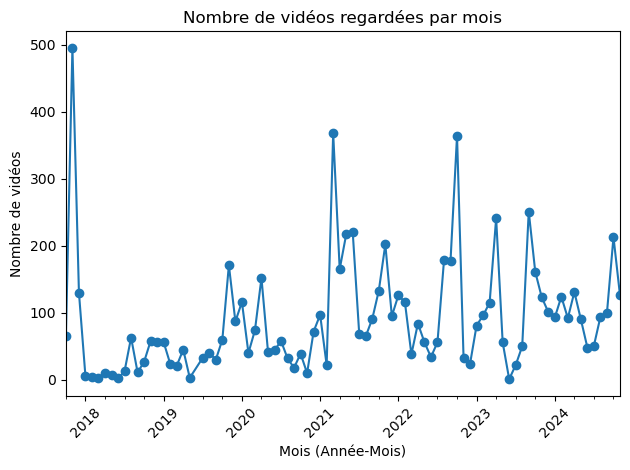

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Assurez-vous que la colonne 'time' est en format datetime
df_filtered['time'] = pd.to_datetime(df_filtered['time'], errors='coerce')

# Extraire l'année et le mois à partir de la colonne 'time'
df_filtered['year'] = df_filtered['time'].dt.year
df_filtered['month'] = df_filtered['time'].dt.to_period('M')  # Mois complet (Année-Mois)

# Compter le nombre de vidéos par année
videos_by_year = df_filtered['year'].value_counts().sort_index()

# Compter le nombre de vidéos par mois
videos_by_month = df_filtered['month'].value_counts().sort_index()

# Afficher les analyses par année
print("Nombre de vidéos regardées par année :")
print(videos_by_year)

# Afficher les analyses par mois
print("\nNombre de vidéos regardées par mois :")
print(videos_by_month)

# Graphique du nombre de vidéos regardées par année
videos_by_year.plot(kind='bar', title='Nombre de vidéos regardées par année')
plt.xlabel('Année')
plt.ylabel('Nombre de vidéos')
plt.show()

# Graphique du nombre de vidéos regardées par mois
videos_by_month.plot(kind='line', marker='o', title='Nombre de vidéos regardées par mois')
plt.xlabel('Mois (Année-Mois)')
plt.ylabel('Nombre de vidéos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
